# Image Classification using Logistic Regression in PyTorch

In [44]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [45]:
dataset = MNIST(root='data/',download=True)

In [46]:
len(dataset)

60000

In [47]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [48]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x20101F29308>, tensor(5))

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: tensor(3)


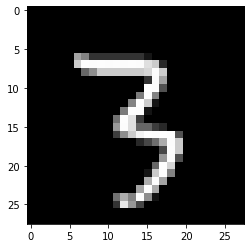

In [50]:
image, label = dataset[44]
plt.imshow(image, cmap='gray')
print("Label:",label)

Label: tensor(7)


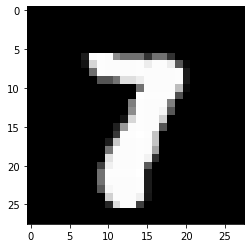

In [51]:
image, label = dataset[168]
plt.imshow(image, cmap='gray')
print('Label:', label)

## Converting images to tensors

In [52]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions which are applied to the images as they are loaded. torchvision.transforms contains many such predefined functions, and we'll use the ToTensor transform to convert images into PyTorch tensors.

In [53]:
dataset = MNIST(root='data/',
               train=True,
               transform=transforms.ToTensor())

In [57]:

image_tensor, label = dataset[0]

The image is now converted to a 1x28x28 tensor. The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are 3 channels: red, green and blue (RGB).

In [55]:
print(image_tensor[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


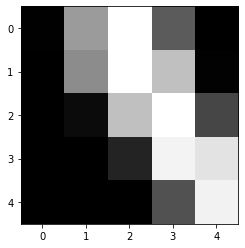

In [56]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

## Training and Validation Datasets

In [58]:
from torch.utils.data import random_split

In [60]:
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

We can now created data loaders to help us load the data in batches. We'll use a batch size of 128.

In [61]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set shuffle=True for the training dataloader, so that the batches generated in each epoch are different, and this randomization helps generalize & speed up the training process. On the other hand, since the validation dataloader is used only for evaluating the model, there is no need to shuffle the images.

## Model

* we will use nn.Linear to create the model instead of defining and initializing the matrices manually.

* Since nn.Linear expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a  vector of size 784 (28*28), before being passed into the model.

* The output for each image is vector of size 10, with each element of the vector signifying the probability a particular target label (i.e. 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [62]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [64]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0133, -0.0333, -0.0320,  ...,  0.0133,  0.0216, -0.0258],
        [ 0.0182,  0.0097,  0.0076,  ..., -0.0038, -0.0202, -0.0058],
        [ 0.0116,  0.0321, -0.0207,  ..., -0.0095, -0.0258,  0.0008],
        ...,
        [-0.0179, -0.0330, -0.0077,  ...,  0.0113, -0.0304,  0.0227],
        [ 0.0341, -0.0169, -0.0009,  ..., -0.0288, -0.0050, -0.0043],
        [ 0.0069,  0.0265,  0.0219,  ..., -0.0026, -0.0196, -0.0157]],
       requires_grad=True)


In [65]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0148,  0.0043,  0.0177,  0.0207,  0.0318,  0.0056,  0.0269,  0.0100,
         0.0269,  0.0089], requires_grad=True)


Although there are a total of 7850 parameters here, conceptually nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset, and pass them into our model.

In [69]:
for images, labels in train_loader:
    print(labels)
    
    print(images.shape)
    images = images.view(-1,28*28)  # Images should be flattened or order (28x28) before feeding to model..from ([128, 1, 28, 28]) to ([128, 784])
    print(images.shape)
    
    outputs=model(images)
    print(outputs)
    
    break

tensor([6, 1, 7, 0, 7, 1, 9, 4, 7, 6, 3, 9, 7, 4, 8, 3, 7, 0, 4, 7, 3, 2, 6, 8,
        9, 1, 4, 4, 2, 7, 7, 9, 8, 5, 1, 2, 7, 6, 5, 0, 9, 2, 9, 0, 0, 2, 4, 3,
        8, 8, 0, 7, 1, 5, 9, 9, 8, 3, 7, 2, 3, 4, 0, 5, 7, 6, 8, 9, 6, 0, 3, 6,
        5, 3, 7, 8, 1, 2, 7, 8, 0, 1, 6, 0, 4, 6, 2, 1, 9, 0, 9, 8, 9, 2, 9, 8,
        4, 7, 3, 0, 4, 3, 8, 7, 1, 9, 2, 7, 0, 6, 1, 5, 9, 5, 6, 9, 1, 0, 0, 6,
        9, 0, 3, 8, 6, 3, 7, 8])
torch.Size([128, 1, 28, 28])
torch.Size([128, 784])
tensor([[ 0.1275, -0.2032,  0.1874,  ...,  0.1625,  0.3043, -0.0748],
        [-0.0255, -0.2329,  0.1969,  ..., -0.2328,  0.2672,  0.1102],
        [ 0.1434, -0.2469,  0.1680,  ...,  0.0257,  0.1264,  0.2521],
        ...,
        [-0.2650, -0.2135,  0.3101,  ..., -0.1722,  0.1493, -0.1087],
        [-0.0082,  0.0394,  0.1900,  ..., -0.0931,  0.1610,  0.2716],
        [-0.0089, -0.1228,  0.0008,  ..., -0.2496,  0.0054,  0.0106]],
       grad_fn=<AddmmBackward>)


In [72]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.view(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [74]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0106,  0.0174, -0.0110,  ..., -0.0333,  0.0302, -0.0020],
         [-0.0234,  0.0118, -0.0008,  ..., -0.0141,  0.0117, -0.0063],
         [ 0.0071, -0.0309, -0.0152,  ..., -0.0279, -0.0303,  0.0001],
         ...,
         [-0.0289, -0.0108,  0.0016,  ...,  0.0080, -0.0136, -0.0153],
         [ 0.0011,  0.0073, -0.0253,  ..., -0.0116, -0.0047, -0.0303],
         [ 0.0352, -0.0107,  0.0285,  ..., -0.0158, -0.0037, -0.0101]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0045, -0.0142, -0.0072, -0.0225, -0.0188, -0.0255, -0.0076,  0.0235,
          0.0337, -0.0198], requires_grad=True)]

In [75]:
for images, labels in train_loader:
    outputs = model(images)
    break
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1555,  0.0236, -0.1233, -0.3108,  0.2147, -0.1315,  0.1643, -0.4852,
         -0.1869, -0.1027],
        [ 0.1669,  0.1121, -0.2051, -0.2069,  0.0094, -0.0496, -0.1440,  0.1072,
         -0.2894, -0.1055]])


For each of the 100 input images, we get 10 outputs, one for each class. The elements of each output row must lie between 0 to 1 and add up to 1,

The softmax function is included in the torch.nn.functional package, and requires us to specify a dimension along which the softmax must be applied.

In [76]:
import torch.nn.functional as F

In [78]:
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1236, 0.1083, 0.0935, 0.0775, 0.1311, 0.0928, 0.1247, 0.0651, 0.0878,
         0.0955],
        [0.1242, 0.1175, 0.0856, 0.0854, 0.1061, 0.1000, 0.0910, 0.1170, 0.0787,
         0.0946]])
Sum:  1.0


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. This is done using torch.max, which returns the largest element and the index of the largest element along a particular dimension of a tensor.

In [79]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 0, 0, 1, 6, 0, 7, 1, 0, 7, 6, 6, 4, 1, 0, 0, 0, 0, 7, 6, 0, 6, 6, 0,
        0, 0, 6, 6, 1, 6, 6, 0, 0, 0, 1, 0, 6, 6, 1, 1, 6, 6, 0, 0, 6, 0, 1, 6,
        0, 6, 2, 6, 1, 0, 0, 7, 1, 0, 0, 1, 0, 1, 8, 0, 0, 0, 1, 0, 6, 0, 6, 6,
        1, 1, 0, 6, 1, 0, 6, 6, 0, 6, 0, 1, 0, 5, 0, 7, 6, 6, 0, 6, 6, 1, 0, 6,
        0, 1, 0, 4, 1, 0, 1, 0, 6, 4, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 6, 1, 1, 6,
        6, 6, 0, 6, 6, 6, 0, 1])
tensor([0.1311, 0.1242, 0.1270, 0.1365, 0.1377, 0.1379, 0.1360, 0.1354, 0.1222,
        0.1392, 0.1896, 0.1488, 0.1266, 0.1277, 0.1387, 0.1251, 0.1340, 0.1605,
        0.1306, 0.1251, 0.1186, 0.1472, 0.1229, 0.1161, 0.1226, 0.1147, 0.1150,
        0.1317, 0.1210, 0.1493, 0.1674, 0.1402, 0.1261, 0.1210, 0.1469, 0.1538,
        0.1269, 0.1937, 0.1270, 0.1307, 0.1137, 0.1329, 0.1194, 0.1217, 0.1509,
        0.1389, 0.1625, 0.1448, 0.1502, 0.1576, 0.1156, 0.1276, 0.1588, 0.1287,
        0.1256, 0.1342, 0.1212, 0.1382, 0.1197, 0.1292, 0.1303, 0.1572, 0.1189,
       

In [81]:
labels

tensor([6, 0, 5, 6, 6, 8, 3, 4, 5, 3, 4, 4, 9, 4, 1, 0, 5, 2, 5, 3, 1, 2, 8, 9,
        8, 1, 3, 3, 4, 5, 4, 5, 7, 3, 9, 8, 3, 4, 7, 6, 3, 7, 9, 3, 6, 6, 4, 2,
        2, 9, 5, 6, 2, 0, 0, 2, 3, 4, 5, 6, 2, 4, 1, 6, 5, 6, 9, 1, 5, 0, 4, 5,
        4, 4, 7, 4, 7, 2, 3, 8, 3, 3, 9, 9, 5, 3, 0, 0, 3, 9, 3, 8, 2, 7, 4, 4,
        2, 2, 7, 5, 7, 3, 2, 1, 4, 7, 7, 5, 5, 7, 1, 8, 4, 7, 7, 5, 8, 4, 7, 2,
        6, 8, 2, 1, 6, 4, 7, 6])

## Evaluation Metric and Loss Function

In [82]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [87]:
accuracy(outputs, labels)

tensor(0.0938)

* While the accuracy is a great way for us (humans) to evaluate the model, it can't be used as a loss function for optimizing our model using gradient descent, for the following reasons:

* It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

* It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

* Due to these reasons, accuracy is a great evaluation metric for classification, but not a good loss function. A commonly used loss function for classification problems is the cross entropy.

In [86]:
loss_fn = F.cross_entropy

In [88]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3456, grad_fn=<NllLossBackward>)


Since the cross entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. Lower the loss, better the model.

## Training the model

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [90]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [91]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

The fit function records the validation loss and metric from each epoch and returns a history of the training process. This is useful for debuggin & visualizing the training process. Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.

Configurations like batch size, learning rate etc. need to picked in advance while training machine learning models, and are called hyperparameters. Picking the right hyperparameters is critical for training an accurate model within a reasonable amount of time, and is an active area of research and experimentation. Feel free to try different learning rates and see how it affects the training process.

In [92]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.324141025543213, 'val_acc': 0.09028876572847366}

The initial accuracy is around 9%, which is what one might expect from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly). Also note that we are using the .format method with the message string to print only the first four digits after the decimal point.

In [93]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9556, val_acc: 0.6223
Epoch [1], val_loss: 1.6869, val_acc: 0.7232
Epoch [2], val_loss: 1.4860, val_acc: 0.7553
Epoch [3], val_loss: 1.3344, val_acc: 0.7732
Epoch [4], val_loss: 1.2180, val_acc: 0.7859


In [94]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1266, val_acc: 0.7977
Epoch [1], val_loss: 1.0535, val_acc: 0.8040
Epoch [2], val_loss: 0.9935, val_acc: 0.8113
Epoch [3], val_loss: 0.9436, val_acc: 0.8173
Epoch [4], val_loss: 0.9014, val_acc: 0.8218


In [95]:
history3 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6805, val_acc: 0.8495
Epoch [1], val_loss: 0.5899, val_acc: 0.8606
Epoch [2], val_loss: 0.5385, val_acc: 0.8690
Epoch [3], val_loss: 0.5051, val_acc: 0.8737
Epoch [4], val_loss: 0.4809, val_acc: 0.8768


In [96]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4788, val_acc: 0.8772
Epoch [1], val_loss: 0.4767, val_acc: 0.8779
Epoch [2], val_loss: 0.4748, val_acc: 0.8781
Epoch [3], val_loss: 0.4729, val_acc: 0.8785
Epoch [4], val_loss: 0.4710, val_acc: 0.8788


In [98]:
history5 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4608, val_acc: 0.8810
Epoch [1], val_loss: 0.4592, val_acc: 0.8810
Epoch [2], val_loss: 0.4577, val_acc: 0.8814
Epoch [3], val_loss: 0.4562, val_acc: 0.8813
Epoch [4], val_loss: 0.4547, val_acc: 0.8812
Epoch [5], val_loss: 0.4533, val_acc: 0.8816
Epoch [6], val_loss: 0.4519, val_acc: 0.8817
Epoch [7], val_loss: 0.4505, val_acc: 0.8818
Epoch [8], val_loss: 0.4491, val_acc: 0.8820
Epoch [9], val_loss: 0.4478, val_acc: 0.8820


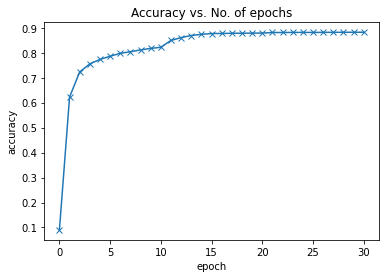

In [106]:
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. It's possible that the model's paramaters are "bouncing" around the optimal set of parameters that have the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

## Testing with individual images

In [107]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: tensor(7)


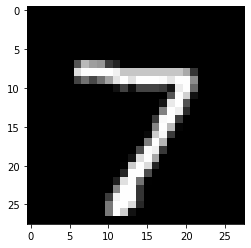

In [108]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [111]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred[0].item()

Label: tensor(7) , Predicted: 7


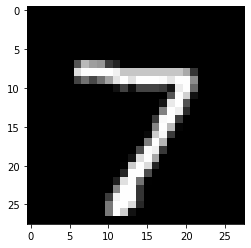

In [112]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: tensor(6) , Predicted: 6


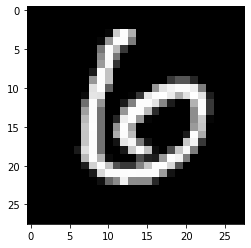

In [115]:
img, label = test_dataset[11]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

## Saving and loading the model

In [116]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.

In [118]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0112, -0.0329, -0.0057,  ...,  0.0145,  0.0195,  0.0198],
                      [-0.0170, -0.0061, -0.0244,  ...,  0.0124, -0.0302, -0.0022],
                      [-0.0154,  0.0302, -0.0346,  ...,  0.0218,  0.0228,  0.0045],
                      ...,
                      [ 0.0268, -0.0179,  0.0162,  ..., -0.0149,  0.0308, -0.0007],
                      [-0.0294, -0.0132, -0.0204,  ..., -0.0247, -0.0201,  0.0093],
                      [-0.0225, -0.0299,  0.0288,  ..., -0.0093,  0.0012, -0.0187]])),
             ('linear.bias',
              tensor([-0.0566,  0.1656, -0.0148, -0.0517,  0.0394,  0.1468, -0.0241,  0.1285,
                      -0.2420, -0.0318]))])

To load the model weights, we can instante a new object of the class MnistModel, and use the .load_state_dict method.

In [119]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0112, -0.0329, -0.0057,  ...,  0.0145,  0.0195,  0.0198],
                      [-0.0170, -0.0061, -0.0244,  ...,  0.0124, -0.0302, -0.0022],
                      [-0.0154,  0.0302, -0.0346,  ...,  0.0218,  0.0228,  0.0045],
                      ...,
                      [ 0.0268, -0.0179,  0.0162,  ..., -0.0149,  0.0308, -0.0007],
                      [-0.0294, -0.0132, -0.0204,  ..., -0.0247, -0.0201,  0.0093],
                      [-0.0225, -0.0299,  0.0288,  ..., -0.0093,  0.0012, -0.0187]])),
             ('linear.bias',
              tensor([-0.0566,  0.1656, -0.0148, -0.0517,  0.0394,  0.1468, -0.0241,  0.1285,
                      -0.2420, -0.0318]))])

In [120]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.41295480728149414, 'val_acc': 0.891406238079071}